Step - 1 Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step - 2 Load the Dataset

In [4]:
df = pd.read_csv(r"C:\Users\Karan Sahu\Desktop\python\Projects-2025\Data Analysis and Visualization\NetFlix.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


Step - 3 Cleaning the data

In [5]:
df.dropna(subset=['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'genres', 'description'])

df.dropna().sum()

show_id         s10s100s1000s1002s1003s1004s1005s1009s101s1010...
type            MovieMovieMovieMovieMovieMovieMovieMovieMovieM...
title           19203 HeroinesBlue Mountain State: The Rise of...
director        Vikram BhattIman BrotosenoLev L. SpiroJeremy S...
cast            Rajneesh Duggal, Adah Sharma, Indraneil Sengup...
country         IndiaIndonesiaUnited StatesUnited States, Fran...
date_added      15-Dec-175-Jan-191-Mar-1625-Feb-191-Jan-215-Ju...
release_year                                              9677111
rating          TV-MATV-PGRRPG-13RTV-14TV-MAPG-13TV-MATV-MATV-...
duration                                                   478776
genres          Horror Movies, International Movies, Thrillers...
description     An architect and his wife move into a castle t...
dtype: object

Step 4 - Charts and Plots


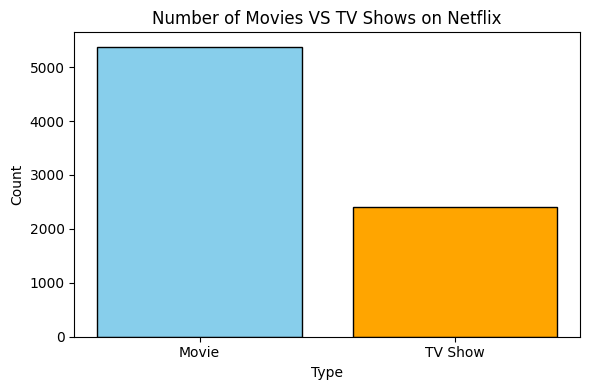

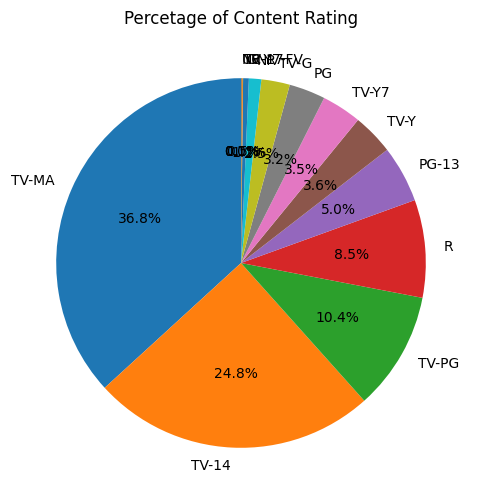

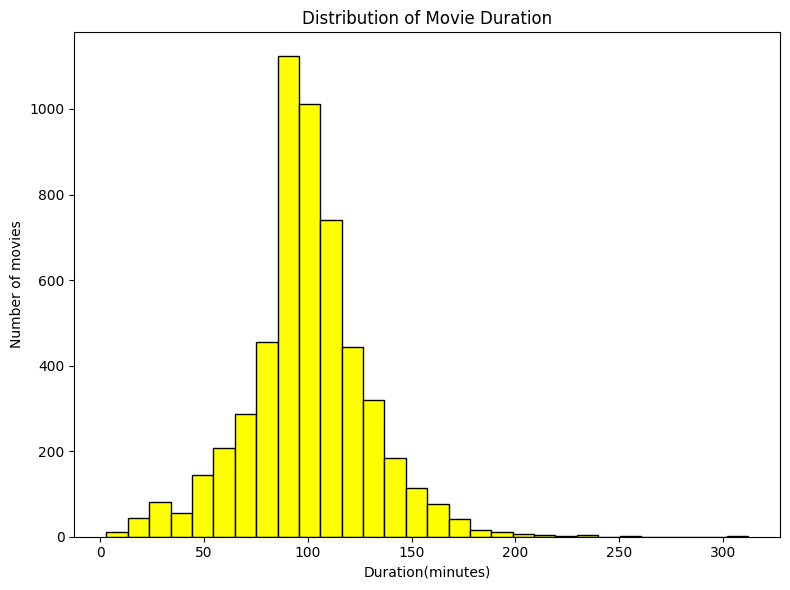

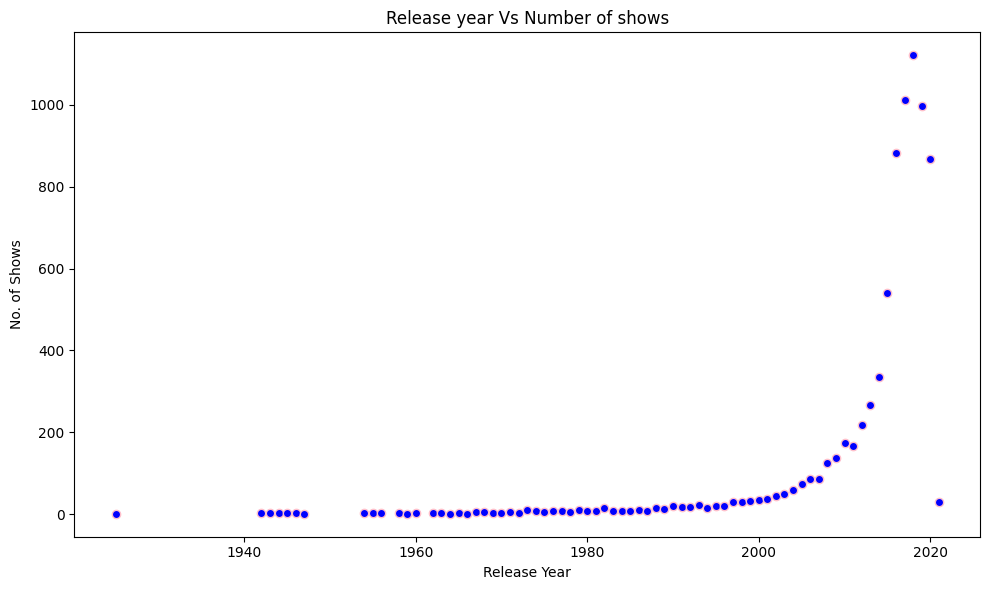

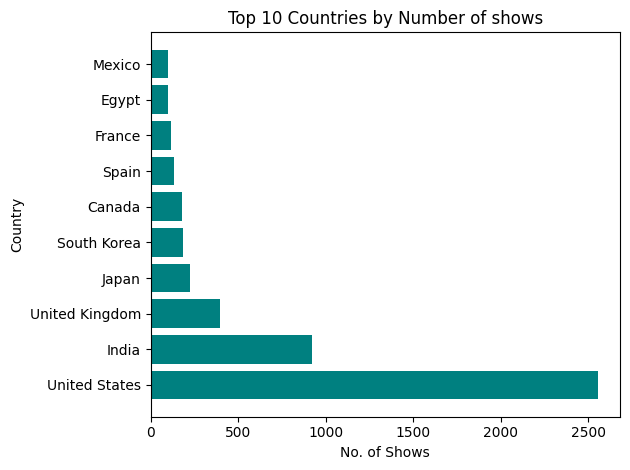

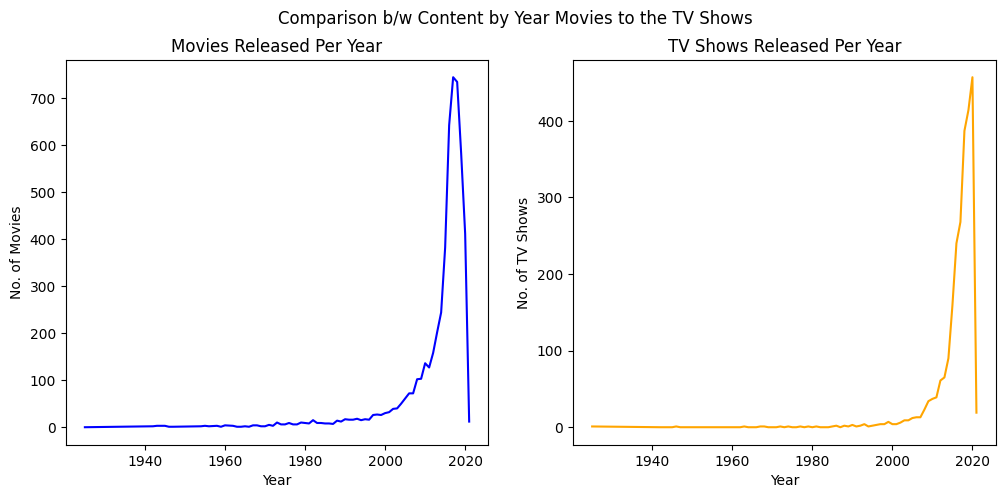

In [10]:
# BAR CHART

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color = ['SkyBlue','Orange'] ,edgecolor = 'black')
plt.title('Number of Movies VS TV Shows on Netflix')
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

# PIE CHART


rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels= rating_counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Percetage of Content Rating')
plt.savefig('content_rating.png')
plt.show()

#HISTOGRAM CHART
movie_df = df[df['type'] == 'Movie'].copy()
# movie_df['duration'] == movie_df['duration'].str.replace('min', '').astype(int)


plt.figure(figsize=(8,6))
plt.hist(movie_df['duration'], bins = 30, color='yellow', edgecolor = 'black')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration(minutes)")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

#SCATTER PLOT

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index , release_counts.values, color = 'blue', edgecolor = "pink")
plt.title("Release year Vs Number of shows")
plt.xlabel("Release Year")
plt.ylabel("No. of Shows")
plt.tight_layout()
plt.savefig("ReleaseYear_Vs_NoOfShows.png")
plt.show()

#HORIZONTAL BAR CHART

country_counts = df['country'].value_counts().head(10)
plt.barh(country_counts.index, country_counts.values, color = 'teal')
plt.title("Top 10 Countries by Number of shows")
plt.xlabel("No. of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("Top_10_Countries.png")
plt.show()

#   SUBPLOTS
content_by_year= df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig,ax = plt.subplots(1,2, figsize = (12,5))

# 1st subplot - Movies

ax[0].plot(content_by_year.index, content_by_year["Movie"], color = 'Blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel("No. of Movies")

# 2nd subplot - TV shows

ax[1].plot(content_by_year.index, content_by_year["TV Show"], color = 'Orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel("No. of TV Shows")


fig.suptitle("Comparison b/w Content by Year Movies to the TV Shows")
plt.savefig("Movies_TV_Shows_Comparison.png")


plt.show()